<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_Estat%C3%ADstica_3_Testes_de_Hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Estatística com Python: testes de hipóteses</b></font>

<a href="https://colab.research.google.com/drive/1w8dNH0Dz31bYlHC_ryEZlEuKLNZ7xLpV"><font size=2; color=gray>Arquivo Colab</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href="https://cursos.alura.com.br/course/estatistica-testes-hipotestes"><font size=2 color=gray>Estatística com Python: testes de hipóteses</a>
<li>Carga Horária: 10 h
<li>Instrutora: Rodrigo Fernando Dias
<li>Data de Início: 12-2022
</ul>


Este notebook é o resultado do material de apoio com anotações próprias sobre o conteúdo de testes de hipóteses.

## <font color=orange><b>Conteúdo</b></font>

* Inferência estatística
    * Estimação pontual
    * Estimação intervalar
    * Intervalo de confiança
    * Tamanho de amostra
    * Probabilidades em uma distribuição normal
* Formulação de hipóteses 
    * Separação da área de rejeição e aceitação das hipóteses
    * Cálculo das estatísticas de comparação
* Testes paramétricos 
    * Teste Unicaudal
    * Teste Bicaudal
    * Teste para Duas Amostras
    * Teste de Normalidade
* Não-parâmetricos
    * Qui-Quadrado
    * Wilcoxon
    * Mann-Whitney

A executar um teste de normalidade com as ferramentas da biblioteca Scipy;
As cinco principais etapas para elaboração de um teste de hipóteses.
A aplicação de um teste paramétrico bicaudal;
A execução dos passos de um teste de hipóteses;
As regras de rejeição da hipótese nula de um teste;
A entender e calcular o p-valor de um teste;
A aplicação de um teste z com as ferramentas do Python.
A distribuição t de Student;
A construir e consultar uma tabela t de Student;
A aplicação de um teste paramétrico unicaudal;
A definição de hipóteses e obtenção de áreas críticas para um teste unicaudal;
A aplicação de um teste t com as ferramentas do Python.
A aplicação de teste de comparação entre médias de amostras diferentes;
A definição das hipóteses para testes entre duas amostras;
A aplicação de um teste z, para duas amostras, com as ferramentas do Python.
A distribuição Qui-quadrado;
A construir e consultar uma tabela de Qui-quadrado;
A aplicação do teste não paramétrico de Qui-quadrado;
O cálculo do p-valor com a distribuição Qui-quadrado.

## <font color=orange><b>Metodologia</b></font>

<font color=orange><b>5 ETAPAS DE TESTE DE HIPÓTESE</b></font>
1. Formulação da $H_0$ e $H_1$
2. Definição da distribuição
    * Normal,
    * T de studant
3. Fixação da significância do teste (área de aceitação e rejeição)
4. Estatística-Teste e P-valor
5. Aceitação ou Rejeição
    * Critério do valor crítico
    * Critério do p-valor


# <font color=orange><b>CURSO</b></font>


In [4]:
# Verificação das versões
import pandas as pd
import numpy as np
import scipy
import statsmodels as sm
import matplotlib
import seaborn as sns

print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do scipy -> %s' % scipy.__version__)
print('Versão do statsmodels -> %s' % sm.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do matplotlib -> %s' % matplotlib.__version__)

Versão do pandas -> 1.3.5
Versão do numpy -> 1.21.6
Versão do scipy -> 1.7.3
Versão do statsmodels -> 0.12.2
Versão do seaborn -> 0.11.2
Versão do matplotlib -> 3.2.2


# <font color=orange>0. CONHECENDO OS DADOS</font>
***

## <font color=orange>0.1 Dataset do projeto</font>

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

<h3>Fonte dos Dados</h3>

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

<h3>Variáveis utilizadas</h3>

> <h4>Renda</h4>
>
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> <h4>Idade</h4>
>
> ***

Idade do morador na data de referência em anos.

> <h4>Altura (elaboração própria)</h4>
>
> ***

Altura do morador em metros.

> <h4>UF</h4>
>
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> <h4>Sexo	</h4>
>
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> <h4>Anos de Estudo</h4>
>
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> <h4>Cor</h4>
>
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

<h4><font color='red'>Observação</font></h4>

> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

<h3>Carregando o dataset</h3>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Verificação do Arquivo CSV
with open('/content/drive/MyDrive/Projetos/LEARNING/DADOS/PNAD_2015.csv') as f:
    print(f.readline())
    print(f.readline())
    print(f.readline())

UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura

11,0,23,8,12,800,1.603807616

11,1,23,2,12,1150,1.739789827



In [5]:
# Carregamento no Pandas
dados = pd.read_csv('/content/drive/MyDrive/Projetos/LEARNING/DADOS/PNAD_2015.csv', sep=',')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# <font color=tomato>1. TESTES DE HIPÓTESES</font>
***

<font color=tomato>O QUE SÃO TESTES DE HIPÓTESES?</font> Testes estatísticos são <font color=tomato><b>regras de decisão</b></font> que permitem avaliar a razoabilidade das hipóteses feitas sobre os <font color=tomato><b>parâmetros populacionais</b></font> e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

Ou seja, através de uma medida estatística, deseja-se saber se uma amostra segue uma hipótese. É considerada uma maneira **formal** de avaliar o comportamento de amostras (dados).

Como por exemplo se homens ganham mais do que mulheres, conhecendo uma amostra da população. Neste caso, se deseja saber se é verdadeira a diferença entre as duas amostras.

## <font color=tomato>1.1 Etapas Básicas de um Teste</font>
***

### **Passo 1** - $H_0$ e $H_1$;

> Formulação das hipóteses $H_0$ e $H_1$, considerando se será unicaudal ou bicaudal.

> <h4> <font color='orange'>Pontos importantes</font>
>
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".
> - s: estimativa da amostra




### **Passo 2** - Distribuição

> Escolha da distribuição amostral adequada;

* Distribuição normal,
* Distribuição t de Student
* Distribuição não paramêtrica

> <h4> <font color='orange'>Pontos importantes</font>
>
> 1. Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> 2. Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> 3. Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

![IMG_Test_n.png](https://drive.google.com/uc?export=view&id=1m-jO4on6Z14aii4tKjDLDR6PIY9vb2uN)




### **Passo 3** - Nível de significância ($\alpha$)

> Fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses.

* Obter os valores de Z para definir cada área de aceitação e rejeição.

(os valores mais freqüentes são 10%, 5% e 1%);

> <h4> <font color='orange'>Pontos importantes</font>
>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://drive.google.com/uc?export=view&id=11I9pMJ2xy6ZtF9XXmpaBuZs6vagAGebU)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://drive.google.com/uc?export=view&id=1U8rf6ACgGORoz3iCq_pmBYASDPA5eT_E)



### **Passo 4** - Estatística-teste / valor crítico

> Cálculo da estatística-teste (valor crítico) e verificação desse valor com as áreas de aceitação e rejeição do teste. O valor crítico é o cálculo da distância relativa entre a média amostral e o valor esperado (o alegado como provável). É uma distância medida em desvio padrões, mas ponderada pelo graus de liberdade (número de amostras).

> <h4> <font color='orange'>Pontos importantes</font>
>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)




### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> <h4> <font color='orange'>Pontos importantes</font>

> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

---

# <font color=tomato>3 TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

Por exemplo, quando temos uma hipótese de que a amostra se distribui como uma normal.

## <font color=tomato>3.1 Teste Bicaudal</font>
***

O teste bicaudal é usado quando a mudança tanto para cima, quanto para baixo é impactante.

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado no problema a seguir. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

<h3><font color='orange'>Caso de aplicação:</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

A dúvida é se média inferida é realmente maior do que a média esperada (500 ml), ou seja, se pode-se descartar a hipótese da média amostral ser igual à media esperada.

---

**Dados do problema**

In [6]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [7]:
amostras = pd.DataFrame(amostra, columns=['Amostra'])

media_amostra = amostras['Amostra'].mean()
media_amostra

503.24

In [8]:
desvio_padrao_amostra = amostras['Amostra'].std()
desvio_padrao_amostra

4.48380305052735

In [9]:
# DADOS PASSADOS
media_esperada = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

### **1** - $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

Tanto a mudança da média para cima, quanto para baxo será problemático para a continuação do negócio. Por isso, o teste bicaudal é o mais apropriado. NEste caso, é formalizado com o $\neq$.

* $H_0: \mu = 500$

* $H_1: \mu \neq 500$ - Bicaudal

---

### **2** - Distribuição

escolha da distribuição amostral adequada

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

* O tamanho da amostra é maior que 30?
    * Resp.: Sim

* O desvio padrão populacional é conhecido?
    * Resp.: Não

---

### **3** - significância do teste ($\alpha$)

fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [10]:
from scipy.stats import norm

In [11]:
# Área até a cauda da direita
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

> Obtendo $z_{\alpha/2}$

* Obtenção do Z para uma cauda direita.
* Definição da área de aceitação e rejeição.


In [12]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

norm.ppf(significancia / 2)

-1.9599639845400545

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **4** - estatística-teste (z amostral)

O valor crítico é o cálculo da distância relativa entre a média amostral e o valor esperado (o alegado como provável). É uma distância medida em desvio padrões, mas ponderada pelo graus de liberdade (número de amostras).

> cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [13]:
z = (media_amostra - media_esperada) / (desvio_padrao_amostra/np.sqrt(n))
z

5.109559775991873

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

---

### **5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

#### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [14]:
z <= -z_alpha_2

False

In [15]:
z >= -z_alpha_2

True

In [16]:
print('z =', round(z, 4))
if(z <= -z_alpha_2 or z >= z_alpha_2):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

z = 5.1096
Rejeitar H0


<font color='orange'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

#### <font color='red'>Critério do $p-valor$</font>

O p-valor é a probabilidade da ocorrência do evento, segundo o valor crítico (estatística-teste). É equivalente à área da cauda do valor crítico.

É uma maneira mais simples de avaliar uma hipótese, pois toda aplicação de estatística irá retornar o p-valor.

> ### Teste Bicaudal
> #### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [17]:
# P-valor em um teste bicaudal
p_valor = 2 * (1 - norm.cdf(z))
p_valor.round(4)

0.0

In [18]:
p_valor = 2 * (norm.sf(z))

In [19]:
if p_valor <= significancia:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


**Forma mais dinâmica**: [statsmodels - ztest](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html)

Solução mais direta através do Statsmodels

In [20]:
from statsmodels.stats.weightstats import ztest
stat_test, p_valor = ztest(x1 = amostra, value=media_esperada)

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [21]:
from statsmodels.stats.weightstats import DescrStatsW

In [22]:
test = DescrStatsW(amostra)
z, p_valor = test.ztest_mean(value=media_esperada)

print('Estatística-teste:', z)
print('P-valor:', p_valor)

Estatística-teste: 5.109559775991874
P-valor: 3.2291031724457596e-07


**EXEMPLO 2**

Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. Considerando um nível de significância igual a 5%, responda as seguintes questões:

1) Qual a hipótese nula a ser testada?

2) Qual o valor da estatística de teste?

3) Qual a conclusão do teste?

In [23]:
from scipy.stats import norm
import numpy as np

media_amostra = 485
desvio_padrao = 20
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 30

# Probabilidade e z-valor cauda-direita
probabilidade = (0.5 + (confianca / 2))
z_alpha_2 = norm.ppf(probabilidade)

z = (media_amostra - media) / (desvio_padrao / np.sqrt(n))

print('z =', round(z, 4))
if(z <= -z_alpha_2 or z >= z_alpha_2):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

z = -4.1079
Rejeitar H0


In [24]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor.round(5)

if p_valor <= significancia:
    print('Rejeitar H0', p_valor.round(5))
else:
    print('Aceitar H0')

Aceitar H0


---

## <font color=orange>3.2 Teste Unicaudal</font>
***

Os **testes unicaudais** verificam as variáveis em relação a um <font color=orange>piso</font> ou a um <font color=orange>teto</font> e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, <font color=orange><b>no máximo</b></font>, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

### Tabela $t$ de Student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

O curva de t de student é uma adaptação da curva normal para casos de pequenos N amostral. Nela a curva é um pouco mais dispersa.

**Consulta:**

1. Qual o tipo do teste (unicaudal ou bicaudal)?
2. Grau de liberdade = n - 1
3. Nível de significância

In [25]:
# Nível de significância  x  Grau de Liberdade  →  t-valor

import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [],
    index = [i for i in range(1,31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for colum in tabela_t_student.columns:
        tabela_t_student.loc[index, colum] = t_student.ppf(1 -float(colum) / 2, index)

index = [('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i/ 100), "{0:0.3f}".format(i/ 100 / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student


Bicaudal                          0.100     0.090  ...      0.020      0.010
Unicaudal                         0.050     0.045  ...      0.010      0.005
Graus de Liberdade (n - 1) 1   6.313752  7.026366  ...  31.820516  63.656741
                           2   2.919986  3.103977  ...   6.964557   9.924843
                           3   2.353363  2.470807  ...   4.540703   5.840909
                           4   2.131847    2.2261  ...   3.746947   4.604095
                           5   2.015048  2.097837  ...    3.36493   4.032143
                           6    1.94318  2.019201  ...   3.142668   3.707428
                           7   1.894579  1.966153  ...   2.997952   3.499483
                           8   1.859548  1.927986  ...   2.896459   3.355387
                           9   1.833113  1.899222  ...   2.821438   3.249836
                           10  1.812461  1.876774  ...   2.763769   3.169273
                           11  1.795885  1.858772  ...   2.718079   3.105807
                           12  1.782288  1.844015  ...   2.680998    3.05454
                           13  1.770933    1.8317  ...   2.650309   3.012276
                           14   1.76131  1.821267  ...   2.624494   2.976843
                           15   1.75305  1.812316  ...    2.60248   2.946713
                           16  1.745884  1.804553  ...   2.583487   2.920782
                           17  1.739607  1.797755  ...   2.566934   2.898231
                           18  1.734064  1.791754  ...    2.55238    2.87844
                           19  1.729133  1.786417  ...   2.539483   2.860935
                           20  1.724718   1.78164  ...   2.527977    2.84534
                           21  1.720743  1.777339  ...   2.517648    2.83136
                           22  1.717144  1.773447  ...   2.508325   2.818756
                           23  1.713872  1.769907  ...   2.499867   2.807336
                           24  1.710882  1.766675  ...   2.492159    2.79694
                           25  1.708141  1.763711  ...   2.485107   2.787436
                           26  1.705618  1.760983  ...    2.47863   2.778715
                           27  1.703288  1.758466  ...    2.47266   2.770683
                           28  1.701131  1.756134  ...    2.46714   2.763262
                           29  1.699127  1.753968  ...   2.462021   2.756386
                           30  1.697261  1.751952  ...   2.457262   2.749996

[30 rows x 10 columns]

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

> Para um teste bicaudal, com nível de confiança de 99% e apenas 3 registros, o valor de t seria igual a 9,92484.

> Para um teste unicaudal, com nível de significância de 5% e 11 registros, o valor de t seria igual a 1,81246.

---

**Dados do problema**

In [26]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


In [27]:
media_amostra = amostra.mean()[0]
desvio_padrao_amostra = amostra.std()[0]

In [28]:
media = 37
significancia = 0.05 
confianca = 1 - significancia 
n = 25
graus_de_liberdades = n - 1

### **1** - $H_0$ e $H_1$

* Geralmente, a hipótese que estamos testando é a hipótese alternativa.


<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

* $H_0: \mu \leq 37$
* $H_1: \mu > 37$

---

### **2** - Distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

* O tamanho da amostra é maior que 30?
    * Resp.: Não

* Podemos afirmar que a população se distribui aproximadamente como uma normal?
    * Resp.: Sim

* O desvio padrão populacional é conhecido?
    * Resp.: Não

O N amostral é menor do que 30 unidades, consequentemenete não podemos usar os cálculos de probabilidade da curva normal, mas devemos usar a de t de student.

---

### **3** - Significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [29]:
from scipy.stats import t as t_student

tabela_t_student[22:25]

Bicaudal                          0.100     0.090  ...     0.020     0.010
Unicaudal                         0.050     0.045  ...     0.010     0.005
Graus de Liberdade (n - 1) 23  1.713872  1.769907  ...  2.499867  2.807336
                           24  1.710882  1.766675  ...  2.492159   2.79694
                           25  1.708141  1.763711  ...  2.485107  2.787436

[3 rows x 10 columns]

#### Obtendo $t_{\alpha}$

Definição da área de aceitação e rejeição.

In [30]:
t_alpha = t_student.ppf(confianca, graus_de_liberdades)
t_alpha

1.7108820799094275

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### **4** - Estatística-teste (t amostral)

Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [31]:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

-3.876893119952081

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

---

### **5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

#### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [32]:
print('t =', round(t, 4))
print('t_alpha =', round(t_alpha, 4))
if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t = -3.8769
t_alpha = 1.7109
Aceitar H0


> <font color='orange'>CONCLUSÃO: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

#### <font color='red'>Critério do valor $p$</font>

> * Teste Unicaudal Superior
> * Rejeitar $H_0$ se o valor $p\leq\alpha$
> * Ou seja, o p-valor precisa ser menor do que o ível de significância

In [33]:
t

-3.876893119952081

In [34]:
p_valor = t_student.sf(t, df=24)
p_valor

0.9996406170303819

In [35]:
p_valor <= significancia

False

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [36]:
from statsmodels.stats.weightstats import DescrStatsW
test = DescrStatsW(amostra)
t, p_valor, df = test.ttest_mean(value=media, alternative='larger')

print(t[0])
print(p_valor[0])
print(df)

-3.8768931199520447
0.9996406170303819
24.0


In [37]:
p_valor[0] <= significancia

False

In [38]:
# Não podemos descartar a hipótese nula

---

### **EXEMPLO 2**

A empresa Limpa Esgoto garante ser capaz de realizar o tratamento de esgoto e obter, no máximo, 150 g de impurezas para cada mil litros de esgoto tratado. Vinte amostras de mil litros de esgoto apresentaram, em média, 230 g de impurezas e desvio padrão amostral igual a 90 g.

Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da empresa Limpa Esgoto?

In [39]:
# DADOS DO PROBLEMA
media_esperada = 150
media_amostral = 230
desvio_padrao_amostra = 90
n = 20
# no máximo => teste unicaudal superior

graus_de_liberdade = n - 1
significancia = 0.05
confianca = 1 - significancia

# 1. HIPÓTESES
# H0 : μ <= 150
# H1 : μ > 150

# 2. DISTRIBUIÇÃO
# < 30 amostras
# População normalmente distribuída
# Desvio padrão da população desconhecida

# 3. SIGNIFICÂNCIA - t-valor da significância
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
"""
t-valo pelo SciPy: 1.729133
t-valor da tabela: 1.729133
"""

# 4. ESTATÍSTICA-TESTE - valor crítico
t = (media_amostral - media_esperada) / (desvio_padrao_amostra / np.sqrt(n))

# 5. ACEITAÇÃO OU REJEIÇÃO
print('t(alpha) =', round(t_alpha, 4))
print('t =', round(t, 4))
if t > t_alpha:
    print('Rejeitar a hipótese nula')
    print(f't > t(alfa)')
# from statsmodels.stats.weightstats import ttest
# stat_test, p_valor = ztest(x1 = amostra, value=media_esperada)

"""
CONCLUSÃO: Com um nível de confiança de 95% podemos rejeitar a H0, ou seja,
 a alegação da empresa é falsa, logo podemos discordar da empresa.
"""
''

t(alpha) = 1.7291
t = 3.9752
Rejeitar a hipótese nula
t > t(alfa)


''

### **EXEMPLO 3**

A pizzaria Muito Queijo alega que a quantidade de queijo em suas pizzas tamanho família é de, no mínimo, 350 g. Uma amostra de 35 pizzas tamanho família revelou uma média de 330 g de queijo por pizza. O desvio padrão amostral foi de 80 g.

Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da alegação da pizzaria?

In [40]:
# DADOS DO PROBLEMA
media = 350
# no mínimo => teste unicaudal inferior
n = 35
media_amostral = 330
desvio_padrao_amostral = 80

significancia = 0.05
confianca = 1-significancia

# 1. HIPÓTESES
# H0: mi >= 350
# H1: mi < 350

# 2. DISTRIBUIÇÃO
# n amostral acima de 30 amostras
# População normalmente distribuída
# Desvio padrão populacional desconhecido

# 3. SIGNIFICÂNCIA - t(alfa)
# obtido na tabela ou por bibliotecas
z_alpha = norm.ppf(significancia)

# 4. ESTATÍSTICA-TESTE e P-VALOR
z = (media_amostral - media) / (desvio_padrao_amostral/ np.sqrt(n))

p_valor = norm.sf(z)

# 5. ACEITAÇÃO OU REJEIÇÃO
print('z(alfa) =', z_alpha.round(4))
print('z =', z.round(4))
if z >= z_alpha:
    print('Aceitar H0')
if z < z_alpha:
    print('Rejeitar H0')


"""CONCLUSÃO: Com um nível de confiança de 95% podemos aceitar a H0, ou seja,
de que a alegação da pizzaria é verdadeira, então as pizzas possuem média acima
de 350 gramas de queijo.

Ao nível de confiança de 95%, não podemos rejeitar a hipótese de que 
as pizzas da pizzaria Muito Queijo têm pelo menos 350 g de queijo.
"""
''

z(alfa) = -1.6449
z = -1.479
Aceitar H0


''

In [41]:
test = DescrStatsW(amostra)
z, p_valor = test.ztest_mean(value=media_esperada)

print('Estatística-teste:', z)
print('P-valor:', p_valor)

Estatística-teste: [-588.30715266]
P-valor: [0.]


## <font color=orange>3.3 Testes para Duas Amostras</font>
***

O teste para duas amostras busca comparar os parâmetros de ambas, com objetivo de testar a <font color='orange'>igualdade</font> entre elas.

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### <font color='orange'>EXEMPLO 1</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente <font color='orange'>entre homens e mulheres</font>.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

<h3>Seleção das amostras

In [42]:
homens = dados.query('Sexo == 0').sample(n=500, random_state=101)['Renda']

In [43]:
mulheres = dados.query('Sexo == 1').sample(n=500, random_state=101)['Renda']

<h3>Dados do problema

In [44]:
media_amostral_H = homens.mean()
media_amostral_H

2142.608

In [45]:
media_amostral_M = mulheres.mean()
media_amostral_M

1357.528

In [46]:
desvio_padrao_amostral_H = homens.std()
desvio_padrao_amostral_H

2548.0508024998717

In [47]:
desvio_padrao_amostral_M = mulheres.std()
desvio_padrao_amostral_M

1569.901190748458

In [48]:
significancia = 0.01
confianca = 1 - significancia
n_H = 500
n_M = 500
D_0 = 0  # diferença entre as duas médias (Hipótese da igualdade)

---

### **1** - $H_0$ e $H_1$

* formulação das hipóteses $H_0$ e $H_1$

<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

> * $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
> * $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

> * $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

> * ou

> * $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq D_0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **2** - Distribuição amostral

escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

* $n = n_1 + n_2$

<font color='red'>Observação importante: grau de liberdade</font>
> * Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$

1. O tamanho da amostra é maior que 30?
    * Resp.: Sim

1. O desvio padrão populacional é conhecido?
    * Resp.: Não

---

### **Passo 3** - significância do teste ($\alpha$)

fixação da significância do teste ($\alpha$)

In [49]:
z_alpha = norm.ppf(confianca)  # teste unicaudal superior
z_alpha.round(2)

2.33

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### **4** - estatística-teste (z)

cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [50]:
numerador = (media_amostral_H - media_amostral_M) - D_0
denominador = np.sqrt((desvio_padrao_amostral_H**2 / n_H) + (desvio_padrao_amostral_M**2 / n_M))

z = numerador/denominador
z

5.8656200577647555

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

#### <font color='red'>Critério do valor crítico</font>

> * Teste Unicaudal
> * Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [51]:
print('z =', z.round(2))
print('z (alfa) =', z_alpha.round(2))

if z >= z_alpha:
    print('Rejeitar H0')
    print(f'{z:.2f} >= {z_alpha:.2f}')

z = 5.87
z (alfa) = 2.33
Rejeitar H0
5.87 >= 2.33


> <font color='orange'>CONCLUSÃO: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

#### <font color='red'>Critério do valor $p$</font>

> * Teste Unicaudal
> * Rejeitar $H_0$ se o valor $p\leq\alpha$

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html

In [57]:
# MÉTODO: DescrStatsW
from statsmodels.stats.weightstats import DescrStatsW

test_H = DescrStatsW(homens)
test_M = DescrStatsW(mulheres)

test = test_H.get_compare(test_M)
z, p_valor = test.ztest_ind(alternative='larger', value=0)

print('Estatística-Teste :', z.round(4))
print('P-valor :', p_valor.round(4))

Estatística-Teste : 5.8656
P-valor : 0.0


In [58]:
if p_valor < significancia:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


In [61]:
# MÉTODO: CompareMeans
from statsmodels.stats.weightstats import CompareMeans

test = CompareMeans(test_H, test_M)
z, p_valor = test.ztest_ind(alternative='larger', value=0)

print('Estatística-Teste :', z.round(4))
print('P-valor :', p_valor.round(4))

if p_valor < significancia:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Estatística-Teste : 5.8656
P-valor : 0.0
Rejeitar H0


### **EXEMPLO 2**

Um fabricante de cosméticos afirma que a adição de um novo composto químico em sua linha de shampoos consegue promover em mais de 2 centímetros o crescimento dos fios de cabelo em um período de 60 dias. Duas amostras de pessoas foram selecionadas e testadas, uma utilizando o shampoo novo (com o composto) e a outra com o shampoo antigo (sem o composto).

Assumindo um nível de confiança de 95% e considerando que as populações se distribuem como uma normal, podemos acreditar na afirmação do fabricante do shampoo?

Quando o problema nos pergunta se podemos acreditar na afirmação do fabricante, está nos indicando o que devemos testar, ou seja, a nossa hipótese alternativa (H1), que no caso é:

* $$H_0: \mu_1 + \mu_2 <= 2$$
* $$H_1: \mu_1 + \mu_2 > 2$$

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# DADOS DO PROBLEMA
composto = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
controle = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

significancia = 0.05
confianca = 1-significancia
n_comp = composto.size
n_cont = controle.size
grau_de_liberdade = n_cont + n_comp - 2


# 1. H0 e H1
# H0: mi_comp <= mi_contr + 2  :: não tem efeito
# H1: mi_comp > mi_contr + 2   :: tem efeito
# unicaudal inferior
D_0 = 2

# 2. DISTRIBUIÇÃO
## n < 30
## Distribuição populacional normal
## Desvio padrão populacional desconhecido

# 3. SIGNIFICÂNCIA - α
from scipy.stats import t as t_student
t_alpha = t_student.ppf(confianca, grau_de_liberdade)

# 4. ESTATÍSTICA-TESTE e P-VALOR
numerador = (composto.mean() - controle.mean()) - D_0
denominador = np.sqrt((controle.std()**2 / n_cont) + (composto.std()**2 / n_comp))
t = numerador/denominador

# 5. ACEITAÇÃO OU REJEIÇÃO
print('t =', t.round(2))
print('t (alfa) =', t_alpha.round(2))

if t > t_alpha:
    print('Rejeitar H0')
    print(f'{t:.2f} > {t_alpha:.2f} + 2')
else:
    print('Aceitar H0')

t = 2.66
t (alfa) = 1.73
Rejeitar H0
2.66 > 1.73 + 2


<font color=orange>Ao nível de confiança de 95%, rejeitamos a hipótese nula e concluímos que a alegação do fabricante é estatisticamente significativa

In [ ]:
# Código do instrutor
from scipy.stats import t as t_student
import numpy as np
import pandas as pd

shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

media_A = shampoo_Novo.mean()
desvio_padrao_A = shampoo_Novo.std()

media_B = shampoo_Antigo.mean()
desvio_padrao_B = shampoo_Antigo.std()

significancia = 0.05
confianca = 1 - significancia
n_A = len(shampoo_Novo)
n_B = len(shampoo_Antigo)
D_0 = 2

graus_de_liberdade = n_A + n_B - 2

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

numerador = (media_A - media_B) - D_0
denominador = np.sqrt((desvio_padrao_A ** 2 / n_A) + (desvio_padrao_B ** 2 / n_B))
t = numerador / denominador

print('t =', round(t, 4))

if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

In [ ]:
# Código do instrutor com p-valor
from statsmodels.stats.weightstats import DescrStatsW

shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

significancia = 0.05

test_A = DescrStatsW(shampoo_Novo)
test_B = DescrStatsW(shampoo_Antigo)
test = test_A.get_compare(test_B)

t, p_valor, df = test.ttest_ind(alternative='larger', value=2)

print('t =', round(t, 4))
print('p-valor =', round(p_valor, 4))
print('graus de liberdade =', df)

if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

### <font color='orange'>EXEMPLO 3</font>

$$\left\{\begin{matrix}
 H_0 : \mu_1 - \mu_2 \geq 5 \\
 H_0 : \mu_1 - \mu_2 < 5
\end{matrix}\right.$$

Um teste de diferença entre médias unicaudal inferior.

```python
ztest_ind(alternative='smaller', value = 5)
```

---

## <font color=orange>3.4 Teste de normalidade</font>
***

No teste de normalidade deseja-se saber se uma amostra segue ou não a distribuição normal.

<h3><a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html>Normal-Test (SciPy)</a></h3>

Sempre leia a documentação, pois nela estará o que ele estará testando e qual será a hipotese nula.





In [ ]:
from scipy.stats import normaltest

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

* Rejeitar $H_0$ se o valor $p\leq 0,05$

### Definição a significância do teste ($\alpha$)

In [ ]:
significancia = 0.05

<h4> Testando a variável Renda

Neste exemplo deseja saber se a amostra de renda segue a distribuição normal. Pelo gráfico de histograma parece que a distribuição possui uma assimetria forte para a direita.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


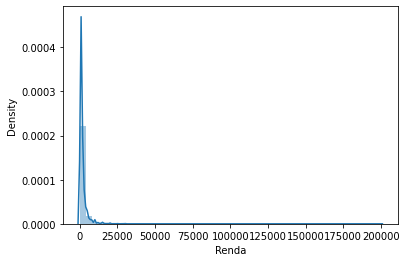

In [ ]:
sns.distplot(dados['Renda'], bins=50)
# .hist(bins=50)

### <font color='tomato'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [ ]:
stat_test, p_valor = normaltest(dados['Renda'])
print(stat_test.round())
print(p_valor)

152381.0
0.0


In [ ]:
# Rejeição da Hipótese Nula
p_valor <= significancia

True

In [ ]:
print(f'A hipótese de que a amostra é proveniente de uma amostra normal é rejeitada ({p_valor}).')

A hipótese de que a amostra é proveniente de uma amostra normal é rejeitada (0.0).


<h4> Testando a variável Altura

A variável altura é uma variável artificial que foi criada para obter um teste favorável.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


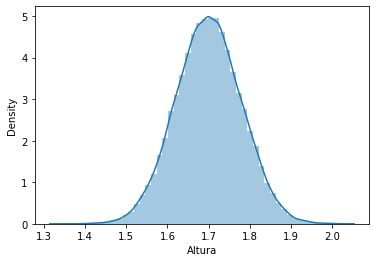

In [ ]:
sns.distplot(dados['Altura'])

<h3><font color='tomato'>Critério do valor $p$</font>

> Rejeitar $H_0$ se o valor $p\leq 0,05$

In [ ]:
stat_test, p_valor = normaltest(dados['Altura'])
print(stat_test.round())
print(p_valor)

0.0
0.9049591541967501


In [ ]:
# Avaliação da Hipótese Nula
p_valor <= significancia

False

Neste caso a hipótese nula não poderá ser rejeitada, logo a amostra possui grandes chances que pertencer a distribuição normal.

# <font color=orange><b>4 TESTES NÃO PARAMÉTRICOS</b></font>
***

* Impossibilidade do Teorema Central do Limite
    * Distribuição não normal
    * Pequenos N
* Não faz suposições sobre a distribuição amostral

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

* Não mexem com os parametros da população, somente avalia se há ou não diferença

## <font color=orange>4.1 Teste do Qui-Quadrado ( $\chi^2$)</font>
***

<font color=orange></font>
Também conhecido como <font color=orange>teste de adequação ao ajustamento</font>, seu nome se deve ao fato de utilizar uma variável <font color=orange>estatística padronizada</font>, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a <font color=orange>hipótese nula</font> de não haver diferença entre as <font color=orange>frequências observadas</font> de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

### Tabela $\chi^2$

[Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html)

In [63]:
# TABELA: P  x  Grau de Liberdade 
import pandas as pd
from scipy.stats import chi

tabela_t_chi_2 = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995]
)

for index in tabela_t_chi_2.index:
    for column in tabela_t_chi_2.columns:
        tabela_t_chi_2.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index)**2)

tabela_t_chi_2.index.name='Graus de Liberdade (n-1)'
tabela_t_chi_2.rename_axis(['p'], axis=1, inplace = True)

tabela_t_chi_2


p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade (n-1),,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894


<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

> * nível de confiança = p

### <font color='orange'>EXEMPLO 1</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

---

**Dados do problema**

In [69]:
F_Observada = [17, 33]
F_Esperada = [25, 25]

significancia = 0.05
confianca = 1 - significancia

k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1

### **1** - $H_0$ e $H_1$

> formulação das hipóteses $H_0$ e $H_1$

<font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

> * $H_0: F_{CARA} = F_{COROA}$

> * $H_1: F_{CARA} \neq F_{COROA}$

---

### **3** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [73]:
tabela_t_chi_2.loc[:3]

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade (n-1),,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382


In [72]:
tabela_t_chi_2.loc[graus_de_liberdade, confianca]
# 3.8415

'3.8415'

#### Obtendo $\chi_{\alpha}^2$

In [74]:
from scipy.stats import chi

chi_2_alpha = chi.ppf(confianca, graus_de_liberdade) ** 2
chi_2_alpha

3.8414588206941245

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

---

### **4** - Estatística-teste

cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [76]:
# MÉTODO 1: declarativo
i_0 = (F_Observada[0] - F_Esperada[0])**2 / F_Esperada[0]
i_1 = (F_Observada[1] - F_Esperada[1])**2 / F_Esperada[1]
chi_2 = (i_0) + (i_1)
chi_2

5.12

In [77]:
# MÉTODO 2: iterativo
chi_2 = 0
for i in range(k):
    chi_2 += (F_Observada[i] - F_Esperada[i])**2 / F_Esperada[i]
chi_2

5.12

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

---

### **5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

#### <font color='orange'>Critério do valor crítico</font>

> Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [78]:
if chi_2 > chi_2_alpha:
    print('Rejeitar H0')
elif chi_2 <= chi_2_alpha:
    print('Aceitar H0')

Rejeitar H0


<font color='orange'>Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.</font>

#### <font color='orange'>Critério do valor $p$</font>

> * Rejeitar $H_0$ se o valor $p\leq\alpha$

In [79]:
raiz_chi_2 = np.sqrt(chi_2)
raiz_chi_2

2.262741699796952

In [80]:
p_valor = chi.sf(raiz_chi_2, df=1)
p_valor

0.023651616655356

In [81]:
p_valor <= significancia

True

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [84]:
# Modo mais direto
from scipy.stats import chisquare

chi_2, p_valor = chisquare(f_obs=F_Observada, f_exp=F_Esperada)

print(chi_2)
print(p_valor)

5.12
0.023651616655356


---

### <font color='orange'>EXEMPLO 2</font>

A realização de um teste não paramétrico Qui-quadrado, com apenas 5 graus de liberdade, obteve-se a estatística de teste no valor de 7,45.

Qual seria o p-valor para este teste?

In [85]:
chi_2 = 7.45

raiz_chi_2 = np.sqrt(chi_2)
p_valor = chi.sf(raiz_chi_2, df=5)
p_valor

0.18926579121171602

## <font color=orange>4.2 Teste Wilcoxon</font>
### <font color=orange>Comparação de duas populações - amostras dependentes</font>
***

Empregado quando se deseja comparar duas amostras relacionadas, <font color=orange>amostras emparelhadas</font>. 

Pode ser aplicado quando se deseja testar a diferença de <font color=orange>duas condições</font>, isto é, quando um mesmo elemento é submetido a duas medidas ou contextos.

* Dependência
* Efeito de um fator (ordem temporal)

1) O teste de Wilcoxon é aplicado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas

2) O teste de Wilcoxon pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas

### <font color='orange'>EXEMPLO 1</font>

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

**Dados do problema**

In [5]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [6]:
significancia = 0.05
confianca = 1 - significancia
n = 35

In [7]:
media_antes = fumo['Antes'].mean()
media_antes

31.857142857142858

In [8]:
media_depois = fumo['Depois'].mean()
media_depois

11.2

### **1** - $H_0$ e $H_1$

formulação das hipóteses $H_0$ e $H_1$

* <font color='orange'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

* $H_0: \mu_{antes} = \mu_{depois}$

* $H_1: \mu_{antes} > \mu_{depois}$

---

### **2** - Distribuição amostral

> escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 20?
#### Resp.: Sim

---

### **3** - fixação da significância do teste ($\alpha$)

> Sempre será um teste bicaudal

#### Obtendo $z_{\alpha/2}$

In [91]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [92]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2.round(2)

1.96

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **4** - Estatística-teste

cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

 $$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

> $T$ = menor das somas de postos de mesmo sinal

> $$\mu_T = \frac{n(n+1)}{4}$$

> $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

* o T converge para um normal em grandes N

**Construindo a tabela com os postos**

In [94]:
fumo['Dif'] = fumo['Depois'] - fumo['Antes']
fumo['|Dif|'] = fumo.Dif.abs()
fumo.head()

,Antes,Depois,Dif,|Dif|
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1


In [96]:
fumo = fumo.sort_values(by='|Dif|')
fumo

,Antes,Depois,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [97]:
fumo['Posto'] = range(1, len(fumo)+1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5


In [101]:
posto = fumo[['|Dif|', 'Posto']].groupby(['|Dif|']).mean()
posto

,Posto
|Dif|,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [102]:
posto.reset_index(inplace=True)
posto

,|Dif|,Posto
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0
5,9,8.5
6,11,10.0
7,12,11.5
8,13,13.0
9,17,15.0


In [103]:
fumo.drop(['Posto'], axis=1, inplace=True)
fumo.head()

,Antes,Depois,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4


In [106]:
fumo = fumo.merge(posto, left_on='|Dif|', right_on='|Dif|', how='left')
fumo

,Antes,Depois,Dif,|Dif|,Posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5
5,22,17,-5,5,6.0
6,21,13,-8,8,7.0
7,23,14,-9,9,8.5
8,10,19,9,9,8.5
9,15,4,-11,11,10.0


In [107]:
fumo['Posto (+)'] = fumo.apply(lambda x: x.Posto if x.Dif > 0 else 0, axis=1)
fumo['Posto (-)'] = fumo.apply(lambda x: x.Posto if x.Dif < 0 else 0, axis=1)
fumo

,Antes,Depois,Dif,|Dif|,Posto,Posto (+),Posto (-)
0,13,14,1,1,1.5,1.5,0.0
1,17,16,-1,1,1.5,0.0,1.5
2,17,19,2,2,3.0,3.0,0.0
3,12,16,4,4,4.5,4.5,0.0
4,14,18,4,4,4.5,4.5,0.0
5,22,17,-5,5,6.0,0.0,6.0
6,21,13,-8,8,7.0,0.0,7.0
7,23,14,-9,9,8.5,0.0,8.5
8,10,19,9,9,8.5,8.5,0.0
9,15,4,-11,11,10.0,0.0,10.0


In [108]:
fumo.drop(['Posto'], axis=1, inplace=True)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto (+),Posto (-)
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0


**Obter $T$**

> $T$ = menor das somas de postos de mesmo sinal

In [109]:
T = min(fumo['Posto (+)'].sum(), fumo['Posto (-)'].sum())
T

22.0

**Obter $\mu_T$**

> $$\mu_T = \frac{n(n+1)}{4}$$


In [110]:
mu_T = (n * (n + 1)) / 4
mu_T

315.0

**Obter $\sigma_T$**

> $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

In [111]:
sigma_T = np.sqrt((n * (n + 1) * ((2 * n) + 1)) / 24)
sigma_T

61.053255441458646

**Obter $Z_{teste}$**

> $$Z = \frac{T - \mu_T}{\sigma_T}$$

In [112]:
Z = (T - mu_T) / sigma_T
Z

-4.799088891843698

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

---

### **5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img022.png' width='80%'>

#### <font color='orange'>Critério do valor crítico</font>

> * Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

In [2]:
if Z <= -z_alpha_2:
    print('Rejeitar H0')
if Z >= z_alpha_2:
    print('Rejeitar H0')

NameError: ignored

> <font color='orange'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

#### <font color='red'>Critério do valor $p$</font>

> * Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [9]:
from scipy.stats import wilcoxon

T, p_valor = wilcoxon(fumo['Antes'], fumo['Depois'])
print(T)
print(p_valor)
p_valor <= significancia

22.0
1.584310018505865e-06


True

### <font color='orange'>EXEMPLO 2</font>

Desconfiado da eficiência dos cursos e materiais de estudo online da Alura, um professor resolveu realizar um teste com um grupo de 14 alunos de sua classe. Para isto, ele submeteu estes alunos a duas etapas distintas e logo depois de cada etapa, aplicou uma avaliação. Na etapa inicial, foram oferecidas aulas normais, sem a utilização do material de apoio da Alura. Na segunda etapa, foram também oferecidas aulas normais, mas com a utilização do material de apoio da Alura. As notas obtidas pelos alunos estão na tabela abaixo:

o resultado do teste, não paramétrico de Wilcoxon, aplicado pelo professor (estatística de teste T e decisão do teste). Considere um nível de significância de 10%.


In [15]:
dados_exemplo = {
    'Aluno': ['Aluno A', 'Aluno B', 'Aluno C', 'Aluno D', 'Aluno E', 'Aluno F', 'Aluno G', 'Aluno H', 'Aluno I', 'Aluno J', 'Aluno K', 'Aluno L', 'Aluno M', 'Aluno N'],
    'Sem Alura': [7,8,6,6,10,4,2,5,9,2,4,9,1,10],
    'Com Alura': [10,10,9,9,9,7,5,8,10,6,3,7,4,8]
}
Alunos = pd.DataFrame(dados_exemplo)

# HIPÓTESES
# H0 : Sem Alura = Com Alura
# H1 : Sem Alura ≠ Com Alura

significancia = 0.1
confianca = 1-significancia

T, p_valor = wilcoxon(Alunos['Sem Alura'], Alunos['Com Alura'])

print(T)
print('P-valor:', p_valor)
if p_valor <= significancia:
    print('Rejeitar H0')
elif p_valor > significancia:
    print('Aceitar H0')


"""
Rejeitar H0, isto é, existe uma diferença significativa na nota média
 do grupo após a utilização do material de apoio da Alura.
 E como a média das notas com a utilização do material de apoio da Alura foi 
 superior (7,5 com Alura e 5,93 sem Alura), é possível afirmar que 
 a utilização do material online tem um efeito positivo no aprendizado dos alunos.
"""

14.0
P-valor: 0.013427734375
Rejeitar H0


In [ ]:
# CÓDIGO DO INSTRUTOR
from scipy.stats import wilcoxon

sem_Alura = pd.Series([ 7,  8, 6, 6, 10, 4, 2, 5,  9, 2, 4, 9, 1, 10])
com_Alura = pd.Series([10, 10, 9, 9,  9, 7, 5, 8, 10, 6, 3, 7, 4,  8])

significancia = 0.10

T, p_valor = wilcoxon(sem_Alura, com_Alura)
print('T =', T)

if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

---

## <font color=orange>4.3 Teste de Mann-Whitney</font>
### <font color=orange>Comparação de duas populações - amostras independentes</font>
***

Mann-Whitney é um <font color=orange>teste não paramétrico</font> utilizado para verificar se duas <font color=orange>amostras independentes</font> foram selecionadas a partir de populações que têm a mesma média. 

Por ser um teste não paramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

* comparação de médias

### <font color='orange'>EXEMPLO 1</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **6 homens** e outra com **8 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade **teste a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

### Seleção das amostras

### Dados do problema

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_m \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino
### $\mu_h \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino

### $
\begin{cases}
H_0: \mu_m = \mu_h\\
H_1: \mu_m < \mu_h
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

Deve-se optar pela distribuição **$t$ de Student**, já que nada é mencionado sobre a distribuição da população, o desvio padrão populacional é desconhecido e o número de elementos investigados é menor que 30.

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $t_{\alpha}$

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img023.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
## 1. Definir os n's:
### $n_1$ = nº de elementos do menor grupo
### $n_2$ = nº de elementos do maior grupo
---
## 2. Obter a soma dos postos
### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$
---
## 3. Obter as estatísticas
# $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
# $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$
---
## 4. Selecionar o menor U
# $$u = min(u_1, u_2)$$
---
## 5. Obter a estatística de teste
# $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

Onde

# $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$
# $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

### Obtendo os postos

### Obtendo $R$

### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$

### Obter $u$

# $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
# $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$

# $$u = min(u_1, u_2)$$


### Obter $\mu{(u)}$

# $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$

### Obter $\sigma{(u)}$

# $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

### Obter $Z$

# $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img024.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img025.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -t_{\alpha}$

### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

---